ME17B158 - Omkar Nath

ME17B170 - Uma T.V.

Program implements PCA followed by SVM to make predictions, and find the optimal parameters

The data files used in the intermediary steps can be found at:<br>
https://drive.google.com/drive/folders/1KZQGxsVdWbNpCf0-0EmXhnsaKcOin4wA?usp=sharing

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn 
import statsmodels.api as sm
from sklearn.cluster import k_means
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
# Reading the previously created modified files
train=pd.read_csv('train_imputed.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.018100,0.0181,0.0,0.000000,63.75,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.00,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.000000,255.0,255.0,255.0,138.000000,9.0000,3.2,0.000000,0.00,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.385714,2.0,1.0,0.0,7.000000,0.0000,0.0,0.000000,0.00,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.00,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,1.319048,0.00,0
6,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,240.800000,223.0,248.0,255.0,255.000000,255.0000,255.0,127.000000,9.00,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.00,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.366667,0.0000,0.0,0.000000,0.00,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.00,0


In [4]:
# Confirming that there are no null values
(train.isnull().sum()).value_counts()

0    785
dtype: int64

In [5]:
# Seprating into x and y
y_train=train['label']
x_train=train.drop('label',axis=1)

In [6]:
# Normalizing the values
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

In [7]:
# Implementing PCA to determine the required number of components
pca=PCA(random_state=42)
pca.fit_transform(x_train_scaled,y_train)
cumulative=np.cumsum(pca.explained_variance_ratio_)

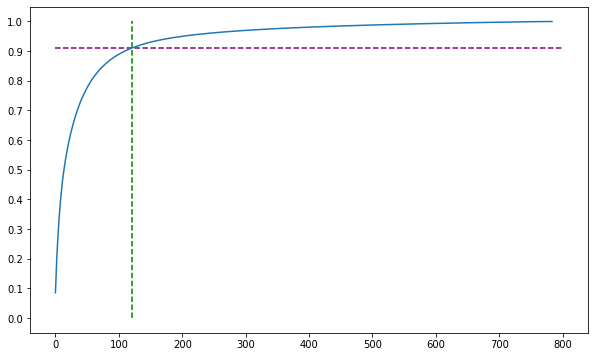

In [8]:
# Visualizing the relevant number of features
fig = plt.figure(figsize=[10,6])
plt.vlines(x=120, ymax=1, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.91, xmax=800, xmin=0, colors="purple", linestyles="--")
sns.lineplot(y=cumulative,x=range(len(cumulative)))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [9]:
# Based on the above graph, 120 components are taken
pca=IncrementalPCA(n_components=120)
x_train_pca=pca.fit_transform(x_train_scaled)

In [10]:
x_train_final=pd.DataFrame(x_train_pca)

In [11]:
x_train_final.head(10)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.587240,-1.396724,-1.925239,9.777574,-14.494102,4.647978,-0.962166,-1.621190,-3.423616,-2.550172,...,0.290262,0.498829,0.089138,0.657395,0.778818,0.533616,-0.433886,0.101131,1.204369,-0.700418
1,-9.181768,0.942405,-1.644141,7.313459,0.762175,-7.255247,-0.582223,1.012028,3.449619,0.026444,...,0.626611,1.443463,0.037413,1.503306,-0.772176,0.474027,0.734114,0.498913,0.738341,0.175947
2,6.042076,16.979607,4.818272,7.516945,-4.743374,-1.344215,9.275744,8.724725,5.173346,-3.958144,...,0.514251,-0.099712,0.211846,0.221314,-0.039567,0.104733,2.105789,0.363324,-1.812815,0.833178
3,0.031325,11.850882,4.452881,8.541694,-6.355803,-2.614578,6.993352,6.720619,2.638649,-6.449960,...,1.391787,1.212856,1.204095,0.642663,-1.461938,-0.149478,0.683594,-0.257343,0.668447,0.939956
4,-4.241444,4.744148,5.795495,13.228423,-9.575190,-1.828931,-7.044574,3.012105,-4.570549,0.353901,...,-0.843731,-1.012739,0.727348,0.049645,0.631228,-0.566123,0.382909,0.102316,0.232686,0.527509
5,-2.879493,0.661801,-10.355570,7.305426,-6.538350,-0.562816,4.361787,1.718876,1.817195,-2.473581,...,0.900928,0.053851,-0.215977,0.539850,0.800238,-0.304351,0.071544,0.343265,0.721280,0.431234
6,8.199237,17.336339,2.831680,5.952087,-6.848656,-1.121514,14.100375,8.613434,0.898150,-0.999590,...,0.546577,0.116577,0.790530,-0.615340,-1.188019,1.547140,0.052484,0.369617,-2.028970,1.212028
7,-5.426879,-6.356358,1.370986,12.060961,-11.389104,-2.471100,5.790331,-0.790784,-4.037038,4.625161,...,0.848759,1.197010,0.239208,-0.046016,0.632611,-0.602308,-0.214110,0.191453,-0.088042,0.082957
8,3.402660,4.022721,0.679809,11.235576,-11.056298,4.321660,-3.440321,4.942538,-0.183899,-5.438422,...,-1.361522,0.050403,0.113592,-0.096562,-1.261859,0.416151,0.322926,0.035873,-0.993992,0.471380
9,-0.034076,4.243356,-0.141781,2.407731,-14.211890,3.941801,-0.008882,-2.843231,-7.559847,-5.170032,...,0.311165,-0.095239,-0.502158,0.866518,-0.380241,-0.214255,0.632048,0.830940,2.193581,-0.939641


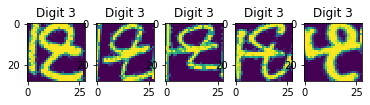

In [12]:
# Visualining the data
img_five = train.loc[train['label']==5].head(5).index.values

for i in range(0,5):
    one = train.iloc[img_five[i], 1:]
    one = one.values.reshape(28,28)
    plt.subplot(1,5,i+1)
    plt.imshow(one)
    plt.title("Digit 3")

In [13]:
# Using a 3-fold approach
folds=KFold(n_splits=3,shuffle=True,random_state=42)
params = {"C": [1, 5, 10, 100]}

# Using a support vector model
model = SVC()

# Grid search scheme is used with 3 folds, using a Support Vector Model to determine best parameter
# Train Accuracy is used as the measurement metric
model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= 'accuracy', 
                        cv = folds, verbose = 1, return_train_score=True)      

In [14]:
# Fitting the model to the data
model_cv.fit(x_train_final, y_train)  

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.6min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(), param_grid={'C': [1, 5, 10, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [15]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.715250,0.106717,2.781137,0.070368,1,{'C': 1},0.958908,0.954695,0.951695,0.9551,0.002959,4,0.988449,0.988751,0.988301,0.9885,0.000187
1,4.553563,0.033482,2.757785,0.009293,5,{'C': 5},0.968806,0.966997,0.962196,0.9660,0.002789,1,0.999550,0.999850,0.999700,0.9997,0.000122
2,4.669862,0.039377,2.979728,0.115310,10,{'C': 10},0.967606,0.966997,0.962796,0.9658,0.002138,3,1.000000,1.000000,1.000000,1.0000,0.000000
3,4.628491,0.085620,2.854389,0.075933,100,{'C': 100},0.967606,0.966997,0.963096,0.9659,0.001998,2,1.000000,1.000000,1.000000,1.0000,0.000000


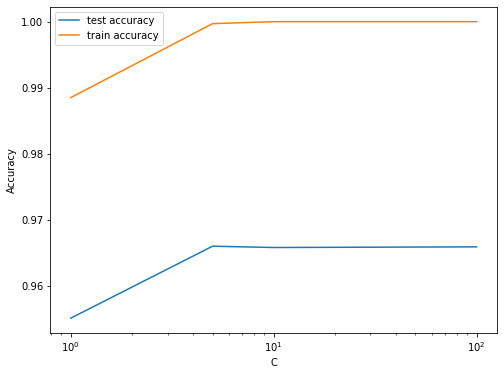

In [16]:
# plot of C versus train and test scores, to visualize the best C
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [17]:
# Best C value and accuracy
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9659997193480597 at C = 5


In [18]:
# Tranforming the test data, and making predictions using the model
x_test_scaled=scaler.transform(test)
x_test_pca=pca.transform(x_test_scaled)
x_test_final=pd.DataFrame(x_test_pca)
test_predict = model_cv.predict(x_test_final)

In [19]:
# Converting the predictions into the required format
solution=pd.DataFrame()
indices=[]
for i in range(1000):
    indices.append('Sample_'+str(i+1)) 
solution['Expected']=test_predict
solution.index=indices
solution.index.name = "Id"

In [20]:
solution.head(10)

,Expected
Id,
Sample_1,6
Sample_2,4
Sample_3,9
Sample_4,7
Sample_5,7
Sample_6,8
Sample_7,7
Sample_8,3
Sample_9,7


In [23]:
# Saving the predictions
solution.to_csv('Predictions.csv')